In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [2]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.shape

(891, 12)

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Comment**: 
* Missing values are mostly from ``Age`` and ``Cabin``.

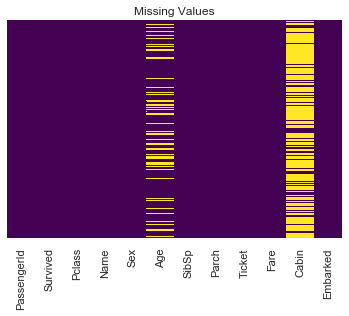

In [5]:
sns.heatmap(titanic_df.isnull(), cbar=False, yticklabels=False, cmap = 'viridis')
plt.title("Missing Values")
plt.show()

# Single variable exploration
### Numerical variables:

In [6]:
# summary statistics for numerical variables:

titanic_df.describe()[['Age', 'SibSp', 'Parch', 'Fare']]

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


**Comment:**

* 75% Age = 38 and mean Age = 29.69 $\implies$ Age range is mostly between 20 and 40 (see histogram below)
* Comparision between SibSp and Parch: 
    * mean SibSp > mean Parch
    * 75% SibSp = 1 
    * 75% Parch = 0
    * $\implies$ not many people brought their children and parents with them. They were more likely to travel with their siblings and spouses (though this is also not a high possibily)
* Fare std = 49.69 and Fare mean > Fare 75% >> Fare median $\implies$ substantial variation in the fare and a majority are low-fare tickets.

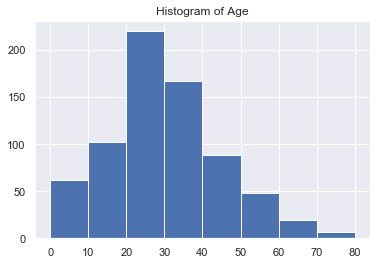

In [7]:
# Histograms:
import math

def plot_hist(df, variable, n_bins, round_edges=True, graph_size=None): # default size
    fig, ax = plt.subplots(figsize=graph_size)
    plt.title("Histogram of {}".format(variable))
        
    if round_edges:
        val_range = df[variable].max() - df[variable].min()
        step = round(val_range/n_bins)
            
        round_min = math.floor(df[variable].min())
        round_max = math.ceil(df[variable].max())
        bins = [edge for edge in range(round_min, round_max+step, step)]
    
        ax.set_xticks(bins)
        ax.hist(df[variable].dropna(), bins=bins)
        
    else:
        ax.hist(df[variable].dropna(), bins=n_bins)

    
plot_hist(titanic_df, 'Age', 8)

**Comment:** This confirms that most people were between 20 and 40 years old. This looks like a right-skewed normal distribution with an extended right tail $\implies$ most were elders and middle-aged rather than children.

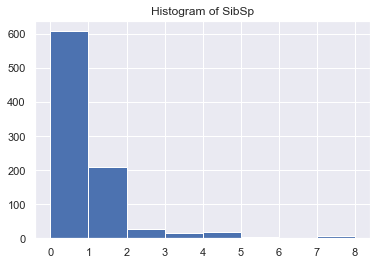

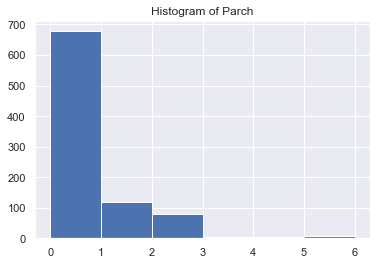

In [8]:
plot_hist(titanic_df, 'SibSp', 8)
plot_hist(titanic_df, 'Parch', 6)

**Comment:** Most people didn't travel with their families. However, they were more likely to travel with their spouse (or siblings) than with their children (or parents). 

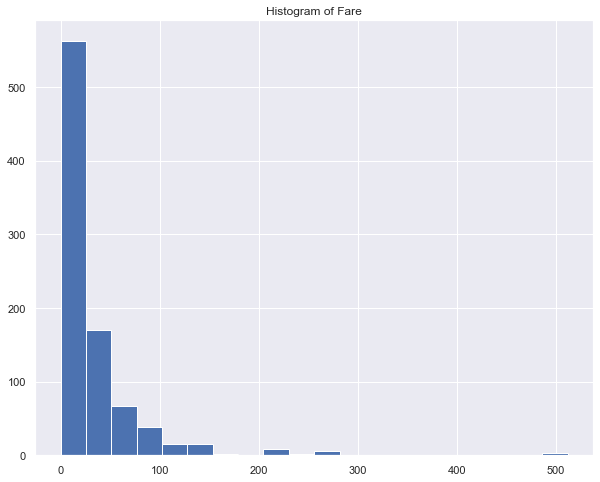

In [9]:
plot_hist(titanic_df, 'Fare', 20, round_edges=False, graph_size=(10, 8))
#plt.xticks([i for i in range(0, 550, 50)])

**Comment:** A majority of people had low-fare tickets. Only a smaller number paid more than 50 and there are extreme outlier(s) of about 500.

In [10]:
# check the outlier(s):
titanic_df[titanic_df.Fare >= 500]

# fact checked and correct!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Text(0.5, 1.0, 'Boxplot of Fare')

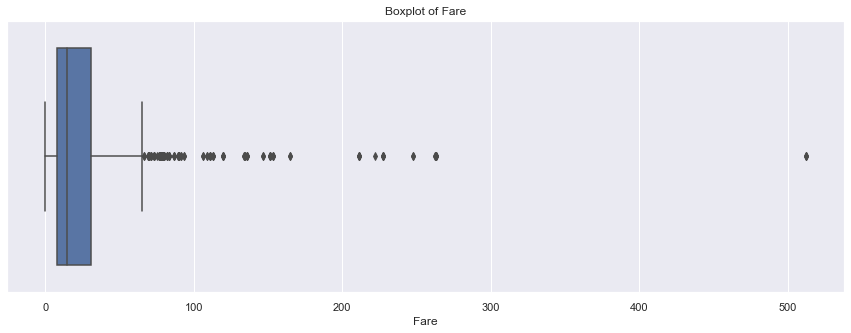

In [11]:
plt.figure(figsize=(15, 5))
sns.boxplot(titanic_df.Fare)
plt.title('Boxplot of Fare')

**Comment:** The boxplot confirms the significant variation in Fare. We see that the median is closer to the 1st quartile than to the 3rd quartile and the max value is far from the 3rd quartile. This indicates as we climb up the "ladder", the gap becomes wider. There are also many outliers detected. All of these facts suggest a distinct wealth gap among the passengers, most of whom could only afford a low-fare ticket.

### Categorical variables:

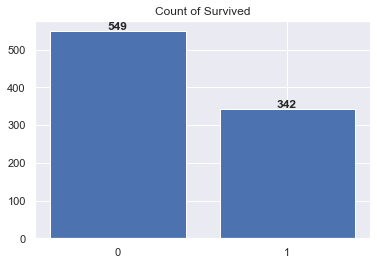

In [12]:
def plot_cat_count(df, variable):
    categories = df.groupby(variable).count().index.astype(str)
    values = df.groupby(variable).count()['PassengerId']
    
    fig, ax = plt.subplots()
    ax.bar(categories, values)
    
    for i, v in enumerate(values):
        ax.text(i - .06, v + 5, str(v), fontweight='bold')
        
    plt.title('Count of {}'.format(variable))    


plot_cat_count(titanic_df, 'Survived')

**Comment**: A person was more likely to die than to survive.

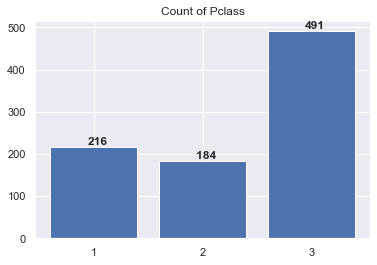

In [13]:
plot_cat_count(titanic_df, 'Pclass')

**Comment:** The count of Pclass is consistent with the distribution of fare seen earlier: most people were of the two lower classes.

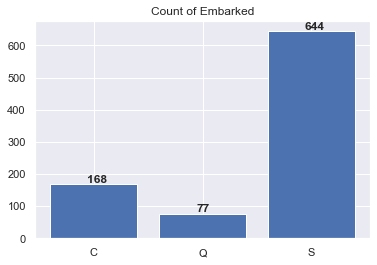

In [14]:
plot_cat_count(titanic_df, 'Embarked')

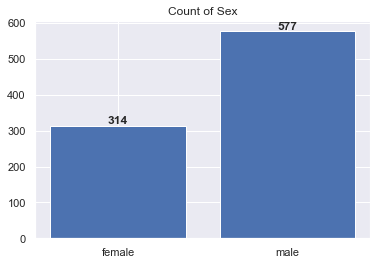

In [15]:
plot_cat_count(titanic_df, 'Sex')

In [16]:
# extract a new feature: cabin class (the first letter of the cabin number)?
# the information of cabin class, however, is mostly missing!
cabin_class = titanic_df.Cabin.str[0]
cabin_class.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [17]:
titanic_df['CabinClass'] = cabin_class
pd.DataFrame(titanic_df.groupby('CabinClass')['Pclass'].value_counts())

Pclass
CabinClass Pclass        
A          1           15
B          1           47
C          1           59
D          1           29
           2            4
E          1           25
           2            4
           3            3
F          2            8
           3            5
G          3            4
T          1            1

In [18]:
pd.DataFrame(titanic_df.groupby('CabinClass')['Fare'].mean())

,Fare
CabinClass,
A,39.623887
B,113.505764
C,100.151341
D,57.244576
E,46.026694
F,18.696792
G,13.581250
T,35.500000


**Comment:** There seems to exist a relationship between CabinClass and Pclass as well as Fare. This feature, therefore, may be useful and not something completely random. However, most people with a recored CabinClass belonged to the higher Pclasses, especially Pclass 1. Will this be helpful to distingush among people of Pclass 1, who would survive? Or will it cause bias?

Spearman correlation coefficient: -0.30623841915740335; p-value: 8.446039381313891e-21
Pearson correlation coefficient: -0.15537105708822455; p-value: 3.1685385030252677e-06


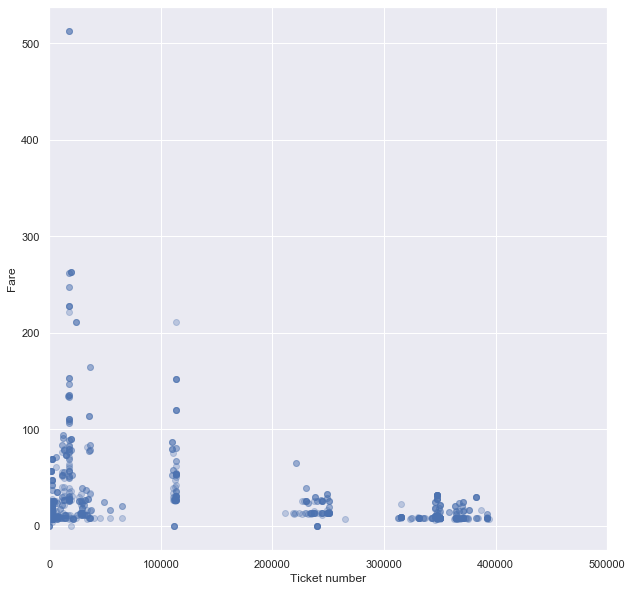

In [19]:
# Does the ticket number has some meaning too? (e.g lower number indicates a lower Fare)?
import re 
def get_ticket_number(x):
    try:
        return int(re.findall('\d+$', x)[0])
    except IndexError:
        return 0         # change this!

ticket_number = titanic_df.Ticket
ticket_number = ticket_number.apply(lambda x: get_ticket_number(x))

plt.figure(figsize=(10, 10))
plt.scatter(ticket_number, titanic_df.Fare, alpha = 0.3)
plt.xlabel('Ticket number')
plt.ylabel('Fare')
plt.xlim(0, 500000)

from scipy import stats
print('Spearman correlation coefficient: {}; p-value: {}'.format(*stats.spearmanr(ticket_number, titanic_df.Fare)))
print('Pearson correlation coefficient: {}; p-value: {}'.format(*stats.pearsonr(ticket_number, titanic_df.Fare)))

**Comment:** There doesn't seem to exist a clear relationship between ticket number and Fare.

# Pairwise exploration

In [20]:
# pairwise exploration: relationship between each variable and survived
# ==> mean difference analysis: e.g. the mean fare of people who survived vs who died

def Cohen_effect_size(gr1, gr2):
    mean_diff = np.mean(gr1) - np.mean(gr2)
    
    n1, n2 = len(gr1), len(gr2)
    var1, var2 = np.var(gr1), np.var(gr2)
    pooled_var = (n1*var1 + n2*var2)/(n1 + n2) 
    
    d = mean_diff/ np.sqrt(pooled_var)
    return mean_diff, d

def sur_mean_diff(variable):
    both = titanic_df.groupby('Survived')
    survived = both.get_group(1)
    dead = both.get_group(0)
    return Cohen_effect_size(survived[variable], dead[variable])

In [21]:
for var in ['Age', 'Fare', 'SibSp', 'Parch']:
    print('Mean {} difference between survived and dead: {:.2f} \nCohen effect size: {:.2f}\n'.format(var, *sur_mean_diff(var)))

Mean Age difference between survived and dead: -2.28 
Cohen effect size: -0.16

Mean Fare difference between survived and dead: 26.28 
Cohen effect size: 0.55

Mean SibSp difference between survived and dead: -0.08 
Cohen effect size: -0.07

Mean Parch difference between survived and dead: 0.14 
Cohen effect size: 0.17



**Comment:** 
* On average, survivors were younger.
* The Cohen effect size is the greatest for the mean fare difference. This suggests that this may be an important feature to classify survived and dead.
* Travelling with children (or parents) increases a person's survival chance? Notice that the effect size is greater than that for the mean age diff (consider the absolute value)
---

In [22]:
print('Mean Pclass difference between survived and dead: {:.2f} \nCohen effect size: {:.2f}\n'.format(*sur_mean_diff('Pclass')))

Mean Pclass difference between survived and dead: -0.58 
Cohen effect size: -0.74



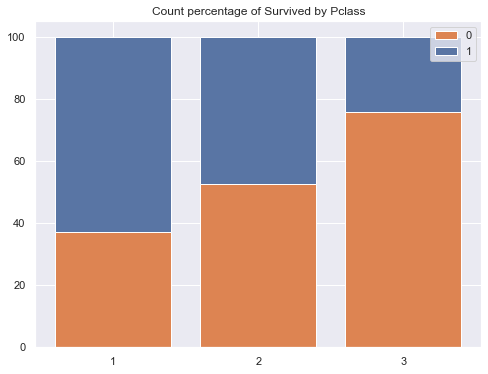

In [23]:
def plot_count_percentage(df, x_var, y_var, palette=plt.rcParams['axes.prop_cycle'].by_key()['color']): 
    # try to come up with a better func name  
    fig, ax = plt.subplots(figsize=(8, 6))
    x_categories = [str(k) for k in df.groupby(x_var).groups.keys()]
    y_groups = df.groupby(y_var)
    prev_percentages = 0
    color_ct = 0
    
    for i, g in y_groups: # stack one (on top of another) at a time
        small_count = g.groupby(x_var).count()['PassengerId']
        big_count = df.groupby(x_var).count()['PassengerId']
        percentages = (small_count/big_count) * 100
        ax.bar(x_categories, percentages, bottom=prev_percentages, color=palette[color_ct])
        prev_percentages = percentages
        color_ct += 1
        
    plt.title('Count percentage of {} by {}'.format(y_var, x_var))
    plt.legend(df.groupby(y_var).groups.keys())
    
plot_count_percentage(titanic_df, 'Pclass', 'Survived', ['#dd8452', '#5975a4'])

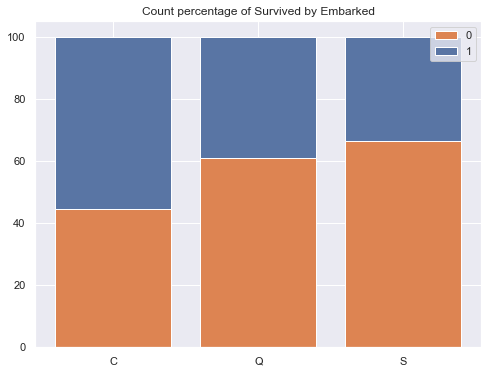

In [24]:
plot_count_percentage(titanic_df, 'Embarked', 'Survived', ['#dd8452', '#5975a4'])

**Comment:** What makes people who embarked at C more likely to survive? Most of them are rich people, i.e. Embarked is correlated to Fare? We take the mean Fare of each Embarked group to see this.

In [25]:
titanic_df.groupby('Embarked').Fare.mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

**Comment:** As espected, the mean Fare of C is significantly higher than those of Q and S. An odd thing is that even though the mean fare of S is twice that of Q, the survival rate of S is slightly lower.

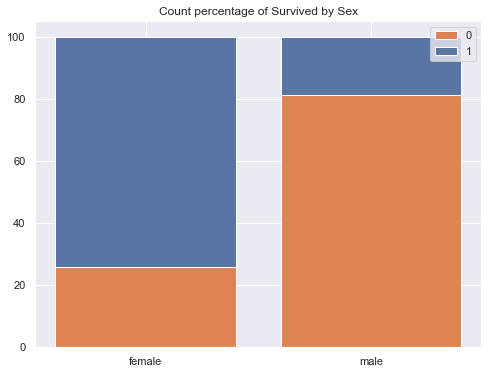

In [32]:
plot_count_percentage(titanic_df, 'Sex', 'Survived', ['#dd8452', '#5975a4'])

**Comment:** Females were much more likely to survive than males!

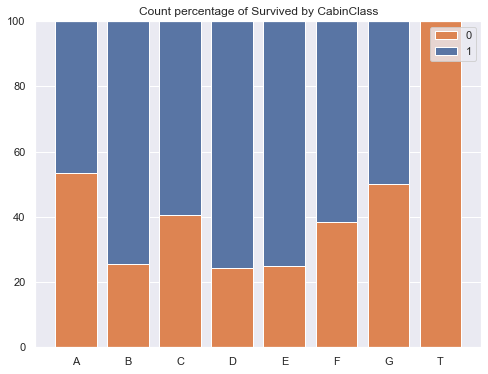

In [31]:
plot_count_percentage(titanic_df, 'CabinClass', 'Survived', ['#dd8452', '#5975a4'])

---

In [27]:
# Next, we look at the correlation matrix and the relationships between the other variables:
corr_df = titanic_df.drop('PassengerId', axis=1).corr() # drop 'Survived' too?
corr_df

# encode some of the categorical variables in a meaningful way?

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


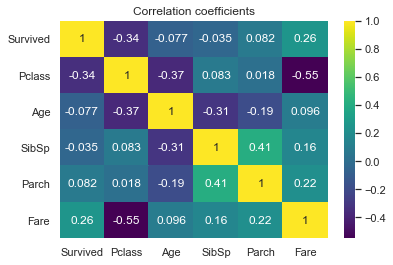

In [28]:
sns.heatmap(corr_df, annot=True, cmap = 'viridis')
plt.title('Correlation coefficients')
plt.show()

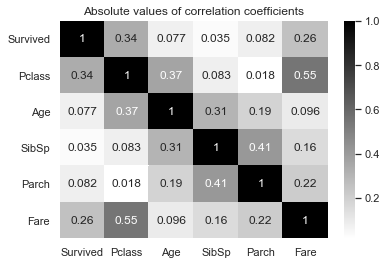

In [29]:
# take the absolute values of the correlation coefficients:
abs_corr_df = corr_df.applymap(lambda x: abs(x))
sns.heatmap(abs_corr_df, annot=True, cmap = 'binary')
plt.title('Absolute values of correlation coefficients')
plt.show()

**Comment:** The most noticeable thing is the correlation between Fare and Pclass, which makes good sense.

# Takeaways:
* Missing values are mostly from ``Age`` and ``Cabin``, especially ``Cabin``.
* There is a significant variation in ``Fare`` with a lot of outliers detected $\implies$ a distinct wealth gap among the passengers 
* The Cohen effect size is the greatest for the mean ``Fare`` difference between survived and dead (0.55).
* Females were much more likely to survive than males.
* ``Fare`` and ``Pclass`` are the most highly correlated.

In [30]:
# export to csv file:
titanic_df.to_csv('updated_train.csv', index=False)

---
## References:
* https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15